In [28]:
from pyforest import *

In [29]:
os.chdir('C:\\Users\\atulk\\Desktop\\datasets')

In [30]:
fcc = pd.read_csv('2017analysisdata.csv',encoding = 'unicode_escape')

C:\Users\atulk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
fcc.shape

(18175, 136)

In [32]:
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
fcc.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

In [34]:
fcc.isnull().sum()

Age                        2808
AttendedBootcamp            466
BootcampFinish            17106
BootcampLoanYesNo         17096
BootcampName              17226
BootcampRecommend         17102
ChildrenNumber            15861
CityPopulation             2821
CodeEventConferences      16566
CodeEventDjangoGirls      18010
CodeEventFCC              16467
CodeEventGameJam          17885
CodeEventGirlDev          17878
CodeEventHackathons       16198
CodeEventMeetup           15703
CodeEventNodeSchool       17729
CodeEventNone             17099
CodeEventOther            17605
CodeEventRailsBridge      18042
CodeEventRailsGirls       18043
CodeEventStartUpWknd      17631
CodeEventWkdBootcamps     17628
CodeEventWomenCode        17694
CodeEventWorkshops        16422
CommuteTime                8929
CountryCitizen             2793
CountryLive                2839
EmploymentField           10059
EmploymentFieldOther      17097
EmploymentStatus           3830
                          ...  
Resource

In [35]:
# Frequency distribution table for 'JobRoleInterest

fcc['JobRoleInterest'].value_counts(normalize = True)*100

Full-Stack Web Developer                                                                                                                                                                                     11.770595
  Front-End Web Developer                                                                                                                                                                                     6.435927
  Data Scientist                                                                                                                                                                                              2.173913
Back-End Web Developer                                                                                                                                                                                        2.030892
  Mobile Developer                                                                                                                          


 #   A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
 #   And also Some people (2.17 %) are interested in Data Science.
 #   A few people (1.7%) are interested in mobile development
  #  Not too many people are interested in domains other than web and mobile development.
'''

##  It’s also interesting to note that many respondents are interested in more than one subject. 
## It’d be useful to get a better picture of how many people are interested in a single subject
## and how many have mixed interests

In [36]:
 # Split each string in the 'JobRoleInterest' column

interests_no_nulls  = fcc['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

# Frequency table for the var describing the number of options

n_of_options = splitted_interests.apply(lambda x: len(x))       # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100


1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

# Only 31.7% of the participants have a clear idea about what programming niche they’d like to work in,
# while the vast majority of students have mixed interests

# The focus of our courses is on web developement and data science,

In [37]:

# Frequency table

web_or_datascience = interests_no_nulls.str.contains(
                     'Web Developer| Data Scientist')                       # returns an array of booleans

freq_table = web_or_datascience.value_counts(normalize = True) * 100
print(freq_table)

True     88.143593
False    11.856407
Name: JobRoleInterest, dtype: float64


# Graph for the frequency table above

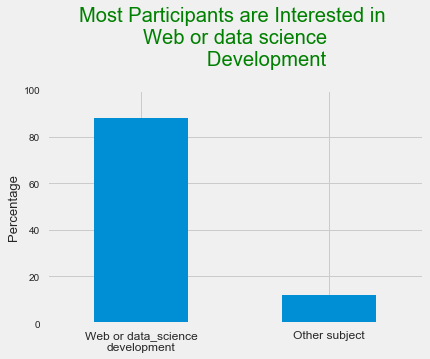

In [38]:
# Graph for the frequency table above


plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('''Most Participants are Interested in \nWeb or data science
           Development''', y = 1.08,color='green')                      # y pads the title upward

plt.ylabel('Percentage', fontsize = 13)

plt.xticks([0,1],['Web or data_science\ndevelopment', 'Other subject'],
           rotation = 0,fontsize=12)                                                  # the initial xtick labels were True and False

plt.ylim([0,100])
plt.show()

# Most people in this survey (roughly 86%) are interested in either web Devlope     or Data Science.

In [39]:
# Isolate the participants that answered what role they'd be interested in
fcc_good = fcc[fcc['JobRoleInterest'].notnull()].copy()



In [40]:
# Frequency tables with absolute and relative frequencies
absolute_frequencies = fcc_good['CountryLive'].value_counts()
relative_frequencies = fcc_good['CountryLive'].value_counts(normalize = True) * 100



 # New coders — locations and densities

 # finding out where these new coders are located, 
 # and the densities (how many new coders there are) for each location. 
 #   This should be a good start for finding out the best two markets for selling our courses

In [41]:
# Display the frequency tables in a more readable format
pd.DataFrame(data = {'Absolute frequency': absolute_frequencies,
                      'Percentage': relative_frequencies}
            ).head()

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765


# 45.7% of our potential customers are located in the US
# India has the second customer density, but it’s just 7.7%

 # Spending money for learning
 # figure out how much money people are actually willing to spend on learning.

## The "MoneyForLearning" column describes in American dollars the amount of money spent by participants

In [42]:
# creating a new column that describes the amount of money a student has spent per month so far
# To do that, we’ll need to divide the MoneyForLearning column to the MonthsProgramming column
#  In MonthsProgramming columns , some values is 0, and if we not removed this, give error when devide
# To avoid dividing by 0, we’ll replace 0 with 1 in the MonthsProgramming column.

In [43]:
# Replace 0s with 1s to avoid division by 0

fcc_good['MonthsProgramming'].replace(0,1, inplace = True)

In [44]:
# New column for the amount of money each student spends each month

fcc_good['money_per_month'] = fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']

fcc_good['money_per_month'].isnull().sum()

675

In [45]:
# Keep only the rows with non-nulls in the `money_per_month` column 
fcc_good = fcc_good[fcc_good['money_per_month'].notnull()]

## We want to group the data by country,
## and then measure the average amount of money that students spend per month in each country.
## First, let’s remove the rows having null values for the CountryLive column

In [46]:
# Remove the rows with null values in 'CountryLive'

fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

# Frequency table to check if we still have enough data

fcc_good['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

## so let’s compute the average value spent per month in each country by a student

In [47]:
# Mean sum of money spent by students each month

countries_mean = fcc_good.groupby('CountryLive').mean()

countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

# Dealing with extreme outliers

# Because in india students spent more money than UK and Canada

 # Let’s use box plots to visualize the distribution of the money_per_month variable for each country.

In [48]:
# Isolate only the countries of interest

only_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    
             'United States of America|India|United Kingdom|Canada')]


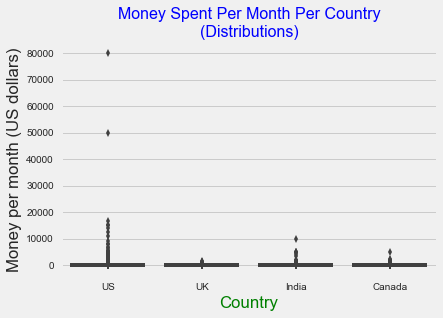

In [57]:
# Box plots to visualize distributions

sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16,color='blue')
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country',color='green')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])   # avoids tick labels overlap
plt.show()

### In US looks two persons spend 50,000 dollar or more each month for learning.
### This is not impossible, but it seems extremely unlikely,
### so we’ll remove every value that goes over 20,000 dollars per month

In [58]:
# Isolate only those participants who spend less than 20000 per month

fcc_good = fcc_good[fcc_good['money_per_month'] < 20000]

# Now let’s recompute the mean values and plot the box plots again.

In [59]:
# Recompute Mean of - sum of money spent by students each month

countries_mean = fcc_good.groupby('CountryLive').mean()

countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

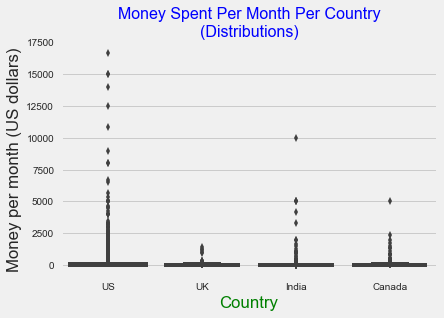

In [61]:
# Isolate again the countries of interest

only_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]


# Box plots to visualize distributions


sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16,color='blue')
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country',color='green')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])    # avoids tick labels overlap

plt.show()

## We can see a few extreme outliers for India (values over 2,500 per month),
## but it’s unclear whether this is good data or not

In [62]:
# Inspect the extreme outliers for India
india_outliers = only_4[
                 (only_4['CountryLive'] == 'India') &
                 (only_4['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


### It seems that neither participant attended a bootcamp. 
### Overall, it’s really hard to figure out from the data whether these persons really spent that much money with learning

## So remove these outliers

In [63]:

# Remove the outliers for India

only_4 = only_4.drop(india_outliers.index)       # using the row labels

# Now check the outliers of US

In [64]:
# Examine the extreme outliers for the US
us_outliers = only_4[
                 (only_4['CountryLive'] == 'United States of America') &
                 (only_4['money_per_month'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


### Out of these 11 extreme outliers, 6 people attended bootcamps, which justifies the large sums of money spent on learning
### Consequently, we’ll remove those rows where participants reported thay they spend 6,000 each month, but they have never attended a bootcamp.

In [65]:
# Remove the respondents who didn't attendent a bootcamp

no_bootcamp = only_4[
     (only_4['CountryLive'] == 'United States of America') &
     (only_4['money_per_month'] >= 6000) &
     (only_4['AttendedBootcamp'] == 0)
   ]

In [66]:
# Now drop these rows

only_4 = only_4.drop(no_bootcamp.index)


### Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey
### so remove these outliers also,because its seem unrealistic

In [67]:
# Remove the respondents that had been programming for less than 3 months

less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') &
    (only_4['money_per_month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)

  ]


In [68]:
# Now drop these outliers row

only_4 = only_4.drop(less_than_3_months.index)

# Examine the extreme outliers for Canada

In [69]:
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') &
    (only_4['money_per_month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [70]:
# Now drop this outliers row

only_4 =only_4.drop(canada_outliers.index)

# Let’s recompute the mean values and generate the final box plots

In [75]:
# Recompute mean sum of money spent by students each month

only_4.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

# Visualize the distributions again

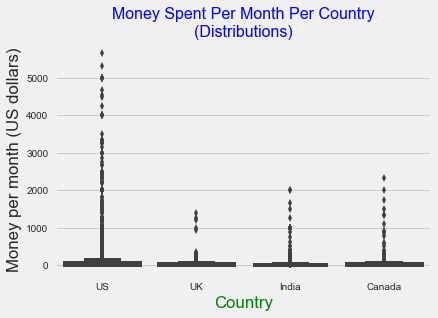

In [76]:
# Visualize the distributions again

sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16,color='blue')
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country',color='green')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

# We decide to sell our courses  at a price of 60 per month

In [77]:
# Recompute mean sum of money spent by students each month

only_4.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

## US , Canada , India' students are able to spend this amount
## But UK ' students are not spend this amount

 # US is our First choice but let’s take a second look at India before deciding to choose Canada as our second best choice:

In [78]:
# Frequency table for the 'CountryLive' column, check potential customers

only_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

## We have almost twice as more potential customers in India than we have in Canada:





# So we decide to split our courses n these 3 country according to pecentage wise
# like US =50 , Canada =30 , India =20
# 0r US =40 , Canada = 35 , India = 25

# Conclusion

## In this project, we analyzed survey data from new coders to find the best two markets to advertise in.
## The only solid conclusion we reached is that the US would be a good market to advertise in.